In [28]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
import pickle
from sklearn.model_selection import train_test_split
import plotly.express as px
from sklearn.metrics import mean_absolute_error
import numpy as np

In [59]:
# import
# source : https://www.kaggle.com/datasets/dgomonov/new-york-city-airbnb-open-data

df = pd.read_csv('AB_NYC_2019.csv')
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [60]:
df.shape

(48895, 16)

In [61]:
# select cols

df = df[['name', 'neighbourhood_group', 'latitude', 'longitude', 'room_type', 'price', 'number_of_reviews', 'minimum_nights', 'calculated_host_listings_count']]
# , 'neighbourhood'
df.head()

,name,neighbourhood_group,latitude,longitude,room_type,price,number_of_reviews,minimum_nights,calculated_host_listings_count
0,Clean & quiet apt home by the park,Brooklyn,40.64749,-73.97237,Private room,149,9,1,6
1,Skylit Midtown Castle,Manhattan,40.75362,-73.98377,Entire home/apt,225,45,1,2
2,THE VILLAGE OF HARLEM....NEW YORK !,Manhattan,40.80902,-73.94190,Private room,150,0,3,1
3,Cozy Entire Floor of Brownstone,Brooklyn,40.68514,-73.95976,Entire home/apt,89,270,1,1
4,Entire Apt: Spacious Studio/Loft by central park,Manhattan,40.79851,-73.94399,Entire home/apt,80,9,10,1


In [62]:
# dummify columns

df = df.join(pd.get_dummies(df['neighbourhood_group'], prefix='neighbourhood_group'))
#df = df.join(pd.get_dummies(df['neighbourhood'], prefix='neighbourhood'))
df = df.join(pd.get_dummies(df['room_type'], prefix='room_type'))
df = df.drop(['neighbourhood_group', 'room_type'], axis=1)
#, 'neighbourhood'
df.head()

,name,latitude,longitude,price,number_of_reviews,minimum_nights,calculated_host_listings_count,neighbourhood_group_Bronx,neighbourhood_group_Brooklyn,neighbourhood_group_Manhattan,neighbourhood_group_Queens,neighbourhood_group_Staten Island,room_type_Entire home/apt,room_type_Private room,room_type_Shared room
0,Clean & quiet apt home by the park,40.64749,-73.97237,149,9,1,6,0,1,0,0,0,0,1,0
1,Skylit Midtown Castle,40.75362,-73.98377,225,45,1,2,0,0,1,0,0,1,0,0
2,THE VILLAGE OF HARLEM....NEW YORK !,40.80902,-73.94190,150,0,3,1,0,0,1,0,0,0,1,0
3,Cozy Entire Floor of Brownstone,40.68514,-73.95976,89,270,1,1,0,1,0,0,0,1,0,0
4,Entire Apt: Spacious Studio/Loft by central park,40.79851,-73.94399,80,9,10,1,0,0,1,0,0,1,0,0


In [63]:
# specify cols

prediction_col = 'price'
ignore_cols = ['name', 'latitude', 'longitude']
features_cols = [c for c in df.columns if (c != prediction_col and c not in ignore_cols)]

In [64]:
# split data train / test

train, test = train_test_split(df, test_size=0.3)

In [67]:
# train model

train_X = df[features_cols]
train_y = df[prediction_col]

test_X = df[features_cols]
test_y = df[prediction_col]

model = RandomForestRegressor(n_estimators=100, max_depth=5, random_state=0)
model.fit(train_X, train_y)

RandomForestRegressor(max_depth=5, random_state=0)

In [68]:
# feature importance

feature_importance_df = pd.DataFrame({'feature':features_cols, 'importance':model.feature_importances_})
feature_importance_df = feature_importance_df.sort_values(by='importance', ascending=False)
feature_importance_df.head(10)

,feature,importance
8,room_type_Entire home/apt,0.320684
1,minimum_nights,0.254987
2,calculated_host_listings_count,0.179463
5,neighbourhood_group_Manhattan,0.082677
0,number_of_reviews,0.082018
6,neighbourhood_group_Queens,0.068589
4,neighbourhood_group_Brooklyn,0.006581
7,neighbourhood_group_Staten Island,0.002333
9,room_type_Private room,0.001737
10,room_type_Shared room,0.000900


In [69]:
# compute predictions on test set
predict_y = model.predict(test_X)

In [70]:
mean_absolute_error(predict_y, test_y)

70.79343406360675

In [71]:
np.mean(test_y)

152.7206871868289

In [72]:
fig = px.scatter(x=test_y, y=model.predict(test_X), range_x=[0,500], range_y=[0,500])
fig.show()

In [10]:
# export model

pickle.dump(model, open('model.pkl', 'wb'))

In [3]:
# tests
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [27]:
np.histogram(df['price'], bins=20)

(array([47660,   937,   133,    55,    33,    24,    10,     8,     7,
            2,     8,     0,     3,     4,     0,     3,     1,     1,
            0,     6]),
 array([    0.,   500.,  1000.,  1500.,  2000.,  2500.,  3000.,  3500.,
         4000.,  4500.,  5000.,  5500.,  6000.,  6500.,  7000.,  7500.,
         8000.,  8500.,  9000.,  9500., 10000.]))

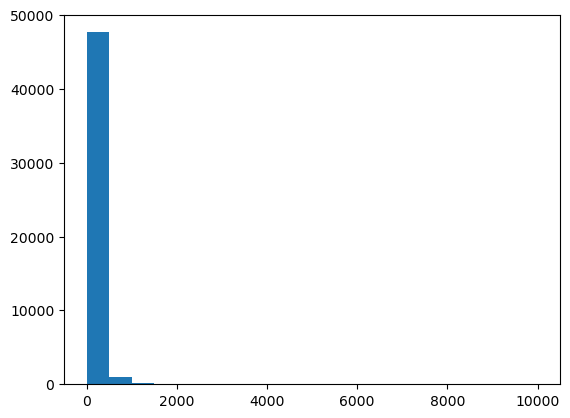

In [11]:
fig = plt.hist(df['price'], bins=20)

In [12]:
fig

(array([4.766e+04, 9.370e+02, 1.330e+02, 5.500e+01, 3.300e+01, 2.400e+01,
        1.000e+01, 8.000e+00, 7.000e+00, 2.000e+00, 8.000e+00, 0.000e+00,
        3.000e+00, 4.000e+00, 0.000e+00, 3.000e+00, 1.000e+00, 1.000e+00,
        0.000e+00, 6.000e+00]),
 array([    0.,   500.,  1000.,  1500.,  2000.,  2500.,  3000.,  3500.,
         4000.,  4500.,  5000.,  5500.,  6000.,  6500.,  7000.,  7500.,
         8000.,  8500.,  9000.,  9500., 10000.]),
 <BarContainer object of 20 artists>)

(array([4.766e+04, 9.370e+02, 1.330e+02, 5.500e+01, 3.300e+01, 2.400e+01,
        1.000e+01, 8.000e+00, 7.000e+00, 2.000e+00, 8.000e+00, 0.000e+00,
        3.000e+00, 4.000e+00, 0.000e+00, 3.000e+00, 1.000e+00, 1.000e+00,
        0.000e+00, 6.000e+00]),
 array([    0.,   500.,  1000.,  1500.,  2000.,  2500.,  3000.,  3500.,
         4000.,  4500.,  5000.,  5500.,  6000.,  6500.,  7000.,  7500.,
         8000.,  8500.,  9000.,  9500., 10000.]),
 <BarContainer object of 20 artists>)

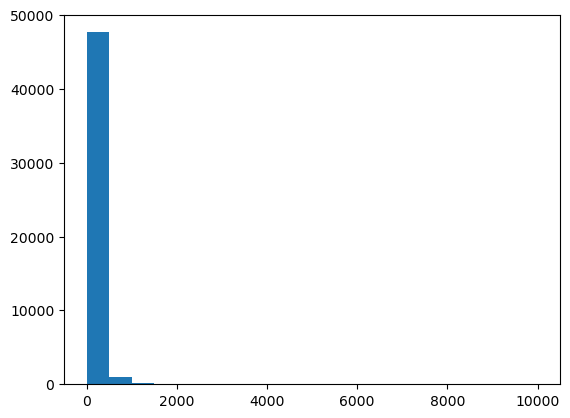

In [13]:
fig, ax = plt.subplots()
ax.hist(df['price'], bins=20)

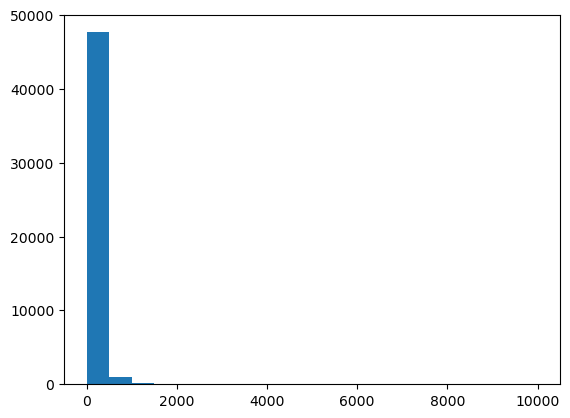

In [15]:
fig

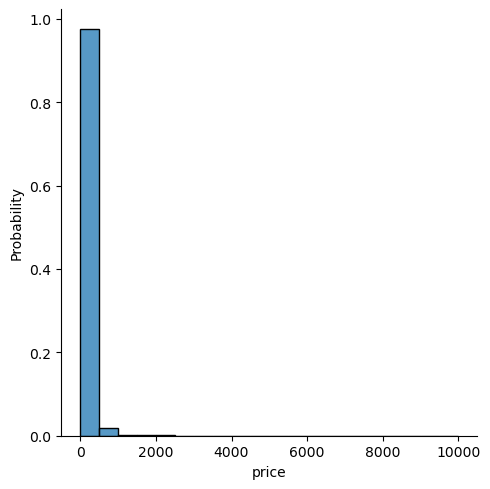

In [20]:
sns.displot(df['price'], stat='probability', bins=20)

In [12]:
df_sample = df.sample(frac=0.01)

In [15]:
fig = px.scatter_mapbox(df_sample, lat='latitude', lon='longitude', labels='labels')
fig.update_layout(mapbox_style="open-street-map")
fig.show()

In [21]:
list(df['neighbourhood_group'].unique())

['Brooklyn', 'Manhattan', 'Queens', 'Staten Island', 'Bronx']

In [18]:
df

,name,latitude,longitude,price,number_of_reviews,neighbourhood_group_Bronx,neighbourhood_group_Brooklyn,neighbourhood_group_Manhattan,neighbourhood_group_Queens,neighbourhood_group_Staten Island,...,neighbourhood_Williamsburg,neighbourhood_Willowbrook,neighbourhood_Windsor Terrace,neighbourhood_Woodhaven,neighbourhood_Woodlawn,neighbourhood_Woodrow,neighbourhood_Woodside,room_type_Entire home/apt,room_type_Private room,room_type_Shared room
0,Clean & quiet apt home by the park,40.64749,-73.97237,149,9,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,Skylit Midtown Castle,40.75362,-73.98377,225,45,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
2,THE VILLAGE OF HARLEM....NEW YORK !,40.80902,-73.94190,150,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0
3,Cozy Entire Floor of Brownstone,40.68514,-73.95976,89,270,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,Entire Apt: Spacious Studio/Loft by central park,40.79851,-73.94399,80,9,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48890,Charming one bedroom - newly renovated rowhouse,40.67853,-73.94995,70,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
48891,Affordable room in Bushwick/East Williamsburg,40.70184,-73.93317,40,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
48892,Sunny Studio at Historical Neighborhood,40.81475,-73.94867,115,0,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
48893,43rd St. Time Square-cozy single bed,40.75751,-73.99112,55,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
